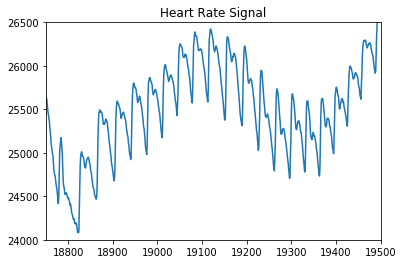

In [14]:
#all following code, excluding modifications where applicable, has been sourced under GNU 3.0 license from
#van Gent, P. (2016). Analyzing a Discrete Heart Rate Signal Using Python. 
#A tech blog about fun things with Python and embedded electronics. 
#Retrieved from: http://www.paulvangent.com/2016/03/15/analyzing-a-discrete-heart-rate-signal-using-python-part-1/
#EMAIL e.grinstead@gmail.com OR WHATSAPP +44 7429 566 454 for help navigating folder contents

import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('2018-01-30.csv') #read heart rate data from its csv file

plt.title('Heart Rate Signal') #the title of our heart rate plot
plt.ylim(24000, 26500)
plt.xlim(18750, 19500)
plt.plot(dataset['Red Signal']) #draw the plot object
plt.show() #display the plot object


/home/andy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  # This is added back by InteractiveShellApp.init_path()


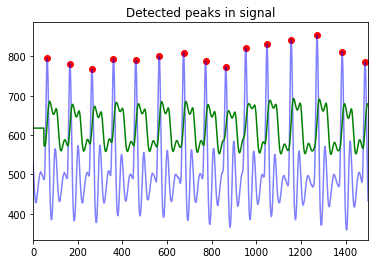

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

dataset = pd.read_csv('heartratedata.csv') #read heart rate data from its csv file

#calculate moving average with 0.75s in either direction, then append to dataset
hrw = 0.5 #1-sided window size, as proportion of the sampling frequency
samplingfreq = 100 #the example dataset was sampled at 100hz
mov_avg = pd.rolling_mean(dataset.hart, window=int(hrw*samplingfreq)) #calculate the moving average

#impute where the moving average function returns NaN, which is the beginning of where x hrw
avg_hr = (np.mean(dataset.hart))
mov_avg = [avg_hr if math.isnan(x) else x for x in mov_avg]

mov_avg = [x*1.2 for x in mov_avg] #for now we raise the moving average by 20% to prevent the T-peaks from interfering
#we will later do this dynamically
dataset['hart_rollingmean'] = mov_avg #append the moving average to the dataset

#mark regions of interest
window = []
peaklist = []
listpos = 0 #use a counter to move between different data columns
for datapoint in dataset.hart:
    rollingmean = dataset.hart_rollingmean[listpos] #get the moving average
    if (datapoint < rollingmean and len(window) < 1): #if there is no R-complex activity
        listpos += 1
        
    elif (datapoint > rollingmean): #if datapoint is above moving average, mark ROI
        window.append(datapoint)
        listpos += 1
    
    else: #if signal drops below local mean, determine highest point
        maximum = max(window)
        beatposition = listpos - len(window) + (window.index(max(window))) #note the point's x-coordinate
        peaklist.append(beatposition) #add detected peak to list
        window = [] #clear marked ROI
        listpos += 1
        
ybeat = [dataset.hart[x] for x in peaklist] #get the y-value of all peaks for plotting purposes

plt.title('Detected peaks in signal')
plt.xlim(0,1500)
plt.plot(dataset.hart, alpha = 0.5, color = 'blue') #plot semi-transparent heart rate
plt.plot(mov_avg, color = 'green') #plot the moving average
plt.scatter(peaklist, ybeat, color = 'red')
plt.show()

/Users/elliotgrinstead/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  # This is added back by InteractiveShellApp.init_path()


Average Heart Beat is: 58.9


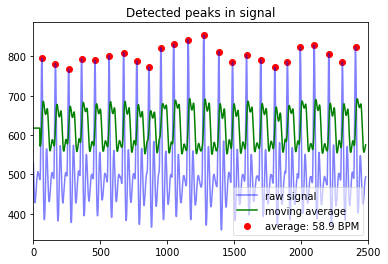

NameError: name 'measures' is not defined

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

dataset = pd.read_csv('heartratedata.csv') #read heart rate data from its csv file

#calculate moving average with 0.75s in either direction, then append to dataset
hrw = 0.5 #1-sided window size, as proportion of the sampling frequency
samplingfreq = 100 #the example dataset was sampled at 100hz
mov_avg = pd.rolling_mean(dataset.hart, window=int(hrw*samplingfreq)) #calculate the moving average

#impute where the moving average function returns NaN, which is the beginning of where x hrw
avg_hr = (np.mean(dataset.hart))
mov_avg = [avg_hr if math.isnan(x) else x for x in mov_avg]

mov_avg = [x*1.2 for x in mov_avg] #for now we raise the moving average by 20% to prevent the T-peaks from interfering
#we will later do this dynamically
dataset['hart_rollingmean'] = mov_avg #append the moving average to the dataset

#mark regions of interest
window = []
peaklist = []
listpos = 0 #use a counter to move between different data columns
for datapoint in dataset.hart:
    rollingmean = dataset.hart_rollingmean[listpos] #get the moving average
    if (datapoint < rollingmean and len(window) < 1): #if there is no R-complex activity
        listpos += 1
        
    elif (datapoint > rollingmean): #if datapoint is above moving average, mark ROI
        window.append(datapoint)
        listpos += 1
    
    else: #if signal drops below local mean, determine highest point
        maximum = max(window)
        beatposition = listpos - len(window) + (window.index(max(window))) #note the point's x-coordinate
        peaklist.append(beatposition) #add detected peak to list
        window = [] #clear marked ROI
        listpos += 1
        
ybeat = [dataset.hart[x] for x in peaklist] #get the y-value of all peaks for plotting purposes

RR_list = []
count = 0
while(count < (len(peaklist)-1)):
    RR_interval = (peaklist[count+1] - peaklist[count]) #calculate distance between each peak in sample
    ms_dist = ((RR_interval/samplingfreq) * 1000.0) #convert sample distances to ms distances
    RR_list.append(ms_dist) #append to ms distances list
    count += 1
    
bpm = 60000 / np.mean(RR_list) #60000ms (1 minute) / average R-R interval of signal
print("Average Heart Beat is: %.01f" %bpm) #round off to 1sf and print

#we also update the plot legend to show the BPM
plt.title('Detected peaks in signal')
plt.xlim(0,2500)
plt.plot(dataset.hart, alpha = 0.5, color = 'blue', label = "raw signal") #plot semi-transparent heart rate
plt.plot(mov_avg, color = 'green', label = "moving average") #plot the moving average
plt.scatter(peaklist, ybeat, color = 'red', label = "average: %.1f BPM" %bpm) #plot the peaks
plt.legend(loc = 4, framealpha = 0.6)
plt.show()

In [7]:
RR_diff = []
RR_sqdiff = []
RR_list = measures['RR_diff']

count = 1 #use to iterate over RR/SS measures
while (count < len(RR_list)-1):
    RR_diff.append(abs((RR_list[count] - RR_list[count+1]))) #calculate absolute difference between successive RR intervals
    RR_sqdiff.append(math.pow(RR_list[count] - RR_list[count+1], 2)) #calculate the squared difference
    count += 1

print(RR_diff, RR_sqdiff)
                   
ibi = np.mean(RR_list) #take the mean of the RR/SS list to get the Inter-Beat Interval
print("IBI:", ibi)

sdnn = np.std(RR_list) #take the st dev of the RR/SS intervals
print("SDNN:", sdnn)

sdsd = np.std(RR_diff) #st dev of differences between RR/SS intervals
print("SDSD:", sdsd)

rmssd = np.sqrt(np.mean(RR_sqdiff)) #take the sq root of the mean of the squared differences between intervals
print("RMSSD:", rmssd)

#to get pNN20/pNN50, first create a list of all intervals differences greater than 20/50ms
nn20 = [x for x in RR_diff if (x > 20)]
nn50 = [x for x in RR_diff if (x > 50)]

pnn20 = float(len(nn20)) / float(len(RR_diff)) #divide the number of items in the nn20 list by the total diff count
pnn50 = float(len(nn50)) / float(len(RR_diff))

print("pNN20, pNN50:", pnn20, pnn50)

NameError: name 'measures' is not defined

In [14]:
#now we tidy up the last cell and put it into callable functions

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

measures = {}

def get_data(filename):
    dataset = pd.read_csv(filename)
    return dataset

def rolmean(dataset, hrw, samplingfreq):
    mov_avg = pd.rolling_mean(dataset.hart, window=int(hrw*samplingfreq))
    avg_hr = (np.mean(dataset.hart))
    mov_avg = [avg_hr if math.isnan(x) else x for x in mov_avg]
    mov_avg = [x*1.2 for x in mov_avg]
    dataset['hart_rollingmean'] = mov_avg
    
def detect_peaks(dataset, samplingfreq):
    window = []
    peaklist = []
    listpos = 0
    for datapoint in dataset.hart:
        rollingmean = dataset.hart_rollingmean[listpos]
        if (datapoint < rollingmean) and (len(window) < 1):
            listpos += 1
        elif (datapoint > rollingmean):
            window.append(datapoint)
            listpos += 1
        else:
            maximum = max(window)
            beatposition = listpos - len(window) + (window.index(max(window))
            peaklist.append(beatposition)
            window = []
            listpos += 1
    measures['peaklist'] = peaklist
    measures['ybeat'] = [dataset.hart[x] for x in peaklist]
    
def calc_RR(dataset, samplingfreq):
    RR_list =[]
    peaklist = measures['peaklist']
    cnt = 0
    while (cnt < (len(peaklist) - 1)):
        RR_interval = (peaklist[cnt+1] - peaklist[cnt])
        ms_dist = ((RR_interval / samplingfreq) * 1000.0)
        RR_list.append(ms_dist)
        cnt += 1
    
    RR_diff = []
    RR_sqdiff = []

    count = 1 #use to iterate over RR/SS measures
    while (count < len(RR_list)-1):
        RR_diff.append(abs((RR_list[count] - RR_list[count+1]))) #calculate absolute difference between successive RR intervals
        RR_sqdiff.append(math.pow(RR_list[count] - RR_list[count+1], 2)) #calculate the squared difference
        count += 1
        
    measures['RR_list'] = RR_list
    measures['RR_diff'] = RR_diff
    measures['RR_sqdiff'] = RR_sqdiff
        
#function to calculate the time series HRV measures
def calc_ts_measures():
    RR_list = measures['RR_list']
    RR_diff = measures['RR_diff']
    RR_sqdiff = measures['RR_sqdiff']
    measures['bpm'] = 60000 / np.mean(RR_list)
    measures['ibi'] = np.mean(RR_list)
    measures['sdnn'] = np.std(RR_list)
    measures['sdsd'] = np.std(RR_diff)
    measures['rmssd'] = np.sqrt(np.mean(RR_sqdiff))
    nn20 = [x for x in RR_diff if (x > 20)]
    nn50 = [x for x in RR_diff if (x > 50)]
    measures['nn20'] = nn20
    measures['nn50'] = nn50
    measures['pnn20'] = float(len(nn20)) / float(len(RR_diff))
    measures['pnn50'] = float(len(nn50)) / float(len(RR_diff))
    
def plotter(dataset, title):
    peaklist = measures['peaklist']
    ybeat = measures['ybeat']
    plt.title(title)
    plt.plot(dataset.hart, alpha=0.5, color='blue', label='raw signal')
    plt.plot(dataset.hart_rollingmean, color='green', label='moving average')
    plt.scatter(peaklist, ybeat, color='red', label='average: %.1f BPM' %measures['bpm'])
    plt.legend(loc=4, framealpha=0.6)
    plt.show()

#finally we write a wrapper function to call the whole analysis quickly
def process(dataset, hrw, samplingfreq): #hrw is the 1-sided window size
    rolmean(dataset, hrw, samplingfreq)
    detect_peaks(dataset, samplingfreq)
    calc_RR(dataset, samplingfreq)
    calc_ts_measures()
    plotter(dataset, 'My Heartbeat Plot')
    



KeyError: 'RR_list'

In [53]:
import pandas as pd
import datetime
import time

dataset = pd.read_csv('2018-01-30.csv')

#simple solution to get an accurate sampling rate
#sampletimer = [x for x in dataset.timer] #.timer is a ms counter that starts recording at 0
#measures['samplingfreq'] = ((len(sampletimer) / sampletimer[-1])*1000) #divide total lengeth of dataset by last timer entry
#multiply the ms value by 1000 to get the Hz

#if your timer is a datetime string, convert to a UNIX timestamp for ease of calculation like so:
unix_time = []
for x in dataset['Date']:
    dt = datetime.datetime.strptime(str(x), "%H:%M:%S.%f")
    us = dt.microsecond
    dt_struct = time.strptime(x, "%H:%M:%S.%f")
    #dt.timetuple
    #print(time.mktime(dt_struct))
    #dt = datetime.fromtimestamp(time.mktime(dt))
    timestamp1900 = -2208978105 #unix timestamp at Jan 01 1900 12:58pm in AEST/GMT+10:00, 2:58am UTC
    timestamp2018 = 1514775495 #unix timestamp at Jan 01 2018 12:58pm
    fixed_timestamp = ((time.mktime(dt_struct) - timestamp1900) + timestamp2018)
    #print("Date Time: {%s}, Unix Time: {%s}"% (dt,  fixed_timestamp))

    unix_time.append(fixed_timestamp + (us / 1000000.0))
#print(unix_time)
#fs = (len(unix_time) / (unix_time[-1] - unix_time[0]))
fs = (15000 / (unix_time[20000] - unix_time[5000]))
print("%s" % fs)
#print("%d" % len(unix_time))


53.96041627782596


In [ ]:
#a Butterworth filter for noise reduction
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.signal import butter, lfilter #Import the extra module required

def get_data(filename):
    dataset = pd.read_csv(filename)
    return dataset

#Define the filter
def butter_lowpass(cutoff, samplingfreq, order=5):
    nyq = 0.5 * samplingfreq #Nyquist frequeny is half the sampling frequency
    normal_cutoff = cutoff / nyq 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
    
def butter_lowpass_filter(data, cutoff, samplingfreq, order):
    b, a = butter_lowpass(cutoff, samplingfreq, order=order)
    y = lfilter(b, a, data)
    return y

dataset = get_data('2018-01-30.csv')
dataset = dataset[5000:25000].reset_index(drop=True) #For visibility take a subselection of the entire signal from samples 6000 - 12000 (00:01:00 - 00:02:00)

filtered = butter_lowpass_filter(dataset['Red Signal'], 2.5, 100.0, 5)#filter the signal with a cutoff at 2.5Hz and a 5th order Butterworth filter

#Plot it
plt.subplot(211)
plt.ylim(24000, 26000)
plt.xlim(10000, 11000)
plt.plot(dataset['Red Signal'], color='Blue', alpha=0.5, label='Original Signal')
plt.legend(loc=4)
plt.subplot(212)
plt.ylim(24000, 26000)
plt.xlim(10000, 11000) #limit filtered signal to have same y-axis as original (filter response starts at 0 so otherwise the plot will be scaled)
plt.plot(filtered, color='Red', label='Filtered Signal')
plt.legend(loc=4)
plt.show()

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

measures = {}

def get_data(filename):
    dataset = pd.read_csv(filename)
    return dataset

def rolmean(dataset, hrw, samplingfreq):
    mov_avg = pd.rolling_mean(dataset.RedSignal, window=int(hrw*samplingfreq))
    avg_hr = (np.mean(dataset.RedSignal))
    mov_avg = [avg_hr if math.isnan(x) else x for x in mov_avg]
    #mov_avg = [x*1.2 for x in mov_avg]
    dataset['RedSignal_rollingmean'] = mov_avg
    
def detect_peaks(dataset, ma_perc, samplingfreq): #Change the function to accept a moving average percentage 'ma_perc' argument
    rolmean = [(x+((x/100)*ma_perc)) for x in dataset.RedSignal_rollingmean] #Raise moving average with passed ma_perc
    window = []
    peaklist = []
    listpos = 0 
    for datapoint in dataset.RedSignal:
        rollingmean = rolmean[listpos]
        if (datapoint <= rollingmean) and (len(window) <= 1): #Here is the update in (datapoint <= rollingmean)
            listpos += 1
        elif (datapoint > rollingmean):
            window.append(datapoint)
            listpos += 1
        else:
            maximum = max(window)
            beatposition = listpos - len(window) + (window.index(max(window)))
            peaklist.append(beatposition)
            window = []
            listpos += 1
    measures['peaklist'] = peaklist
    measures['ybeat'] = [dataset.RedSignal[x] for x in peaklist]
    measures['rolmean'] = rolmean
    calc_RR(dataset, samplingfreq)
    measures['rrsd'] = np.std(measures['RR_list'])
    
def fit_peaks(dataset, samplingfreq):
    ma_perc_list = [5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 150, 200, 300] #List with moving average raise percentages, make as detailed as you like but keep an eye on speed
    rrsd = []
    valid_ma = []
    for x in ma_perc_list: #Detect peaks with all percentages, append results to list 'rrsd'
        detect_peaks(dataset, x, samplingfreq)
        bpm = ((len(measures['peaklist'])/(len(dataset.RedSignal)/samplingfreq))*60)
        rrsd.append([measures['rrsd'], bpm, x])
        
    for x,y,z in rrsd: #Test list entries and select valid measures
        if ((x > 1) and ((y > 30) and (y < 130))):
            valid_ma.append([x, z])
            
    measures['best'] = min(valid_ma, key = lambda t: t[0])[1] #Save the ma_perc for plotting purposes later on (not needed)
    detect_peaks(dataset, min(valid_ma, key = lambda t: t[0])[1], samplingfreq) #Detect peaks with 'ma_perc' that goes with lowest rrsd
    
def calc_RR(dataset, samplingfreq):
    RR_list =[]
    peaklist = measures['peaklist']
    cnt = 0
    while (cnt < (len(peaklist) - 1)):
        RR_interval = (peaklist[cnt+1] - peaklist[cnt])
        ms_dist = ((RR_interval / samplingfreq) * 1000.0)
        RR_list.append(ms_dist)
        cnt += 1
    
    RR_diff = []
    RR_sqdiff = []

    count = 1 #use to iterate over RR/SS measures
    while (count < len(RR_list)-1):
        RR_diff.append(abs((RR_list[count] - RR_list[count+1]))) #calculate absolute difference between successive RR intervals
        RR_sqdiff.append(math.pow(RR_list[count] - RR_list[count+1], 2)) #calculate the squared difference
        count += 1
        
    measures['RR_list'] = RR_list
    measures['RR_diff'] = RR_diff
    measures['RR_sqdiff'] = RR_sqdiff
        
#function to calculate the time series HRV measures
def calc_ts_measures():
    RR_list = measures['RR_list']
    RR_diff = measures['RR_diff']
    RR_sqdiff = measures['RR_sqdiff']
    measures['bpm'] = 60000 / np.mean(RR_list)
    measures['ibi'] = np.mean(RR_list)
    measures['sdnn'] = np.std(RR_list)
    measures['sdsd'] = np.std(RR_diff)
    measures['rmssd'] = np.sqrt(np.mean(RR_sqdiff))
    nn20 = [x for x in RR_diff if (x > 20)]
    nn50 = [x for x in RR_diff if (x > 50)]
    measures['nn20'] = nn20
    measures['nn50'] = nn50
    measures['pnn20'] = float(len(nn20)) / float(len(RR_diff))
    measures['pnn50'] = float(len(nn50)) / float(len(RR_diff))
    
    
def plotter(dataset, title):
    peaklist = measures['peaklist']
    ybeat = measures['ybeat']
    plt.title(title)
    plt.ylim((16500, 20500))
    plt.plot(dataset.RedSignal, alpha=0.5, color='blue', label='raw signal')
    plt.plot(dataset.RedSignal_rollingmean, color='green', label='moving average')
    plt.scatter(peaklist, ybeat, color='red', label='average: %.1f BPM' %measures['bpm'])
    plt.legend(loc=4, framealpha=0.6)
    plt.show()

#finally we write a wrapper function to call the whole analysis quickly
def process(dataset, hrw, samplingfreq): #hrw is the 1-sided window size
    rolmean(dataset, hrw, samplingfreq)
    detect_peaks(dataset, samplingfreq)
    fit_peaks(dataset, samplingfreq)
    calc_RR(dataset, samplingfreq)
    calc_ts_measures()
    plotter(dataset, 'My Heartbeat Plot')

/home/andy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=75,center=False).mean()


Average Heart Beat is: 152.6
Average RR interval is: 393.2


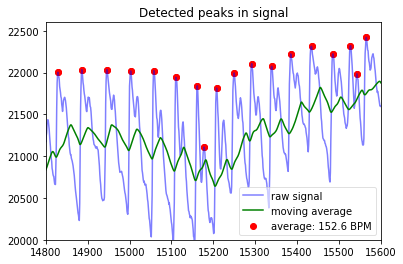

In [57]:
#THIS IS THE MODULE THAT CAN ACTUALLY READ OUR SIGNAL
#WORK ON IMPROVING THIS MODULE WITH SIGNAL FILTERING, RESPAMPLING, DYNAMIC MOVING AVERAGE OR WHATEVER WORKS

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

dataset = pd.read_csv('../Data/2018-01-30_Finger.csv') #read heart rate data from its csv file
'''
unix_time = []
for x in dataset['Date']:
    dt = datetime.datetime.strptime(str(x), "%H:%M:%S.%f")
    us = dt.microsecond
    dt_struct = time.strptime(x, "%H:%M:%S.%f")
    unix_time.append(time.mktime(dt_struct) + (us / 1000000.0))
samplingfreq = (len(unix_time) / (unix_time[-1] - unix_time[0]))
'''
#calculate moving average with 0.75s in either direction, then append to dataset
hrw = 0.75 #1-sided window size, as proportion of the sampling frequency
samplingfreq = 100 #write a module to calculate this from the dataset later
mov_avg = pd.rolling_mean(dataset['Red Signal'], window=int(hrw*samplingfreq)) #calculate the moving average

#impute where the moving average function returns NaN, which is the beginning of where x hrw
avg_hr = (np.mean(dataset['Red Signal']))
mov_avg = [avg_hr if math.isnan(x) else x for x in mov_avg]

#mov_avg = [x*1 for x in mov_avg] #for now we raise the moving average by a % to prevent the T-peaks from interfering
#we will later do this dynamically
dataset['Red Signal_rollingmean'] = mov_avg #append the moving average to the dataset

#mark regions of interest
window = []
peaklist = []
listpos = 0 #use a counter to move between different data columns
for datapoint in dataset['Red Signal']:
    rollingmean = dataset['Red Signal_rollingmean'][listpos] #get the moving average
    if (datapoint <= rollingmean and len(window) < 1): #if there is no R-complex activity
        listpos += 1
        
    elif (datapoint > rollingmean): #if datapoint is above moving average, mark ROI
        window.append(datapoint)
        listpos += 1
    
    else: #if signal drops below local mean, determine highest point
        #maximum = max(window)
        beatposition = listpos - len(window) + (window.index(max(window))) #note the point's x-coordinate
        peaklist.append(beatposition) #add detected peak to list
        window = [] #clear marked ROI
        listpos += 1
        
ybeat = [dataset['Red Signal'][x] for x in peaklist] #get the y-value of all peaks for plotting purposes

RR_list = []
count = 0
while(count < (len(peaklist)-1)):
    RR_interval = (peaklist[count+1] - peaklist[count]) #calculate distance between each peak in sample
    ms_dist = ((RR_interval/samplingfreq) * 1000.0) #convert sample distances to ms distances
    RR_list.append(ms_dist) #append to ms distances list
    count += 1
    
bpm = 60000 / np.mean(RR_list) #60000ms (1 minute) / average R-R interval of signal
print("Average Heart Beat is: %.01f" %bpm) #round off to 1sf and print
print("Average RR interval is: %.01f" % np.mean(RR_list))

plt.title('Detected peaks in signal')
plt.ylim(20000, 22600)
plt.xlim(14800, 15600)
plt.plot(dataset['Red Signal'], alpha = 0.5, color = 'blue', label = "raw signal") #plot semi-transparent heart rate
plt.plot(mov_avg, color = 'green', label = "moving average") #plot the moving average
plt.scatter(peaklist, ybeat, color = 'red', label = "average: %.1f BPM" %bpm) #plot the peaks
plt.legend(loc = 4, framealpha = 0.6)
plt.scatter(peaklist, ybeat, color = 'red')
plt.show()
